X_train 的 (行數, 欄數): (426, 30)
y_train 的 (行數, 欄數): (426,)
X_test 的 (行數, 欄數): (143, 30)
y_test 的 (行數, 欄數): (143,)

測試準確度: 0.958
訓練準確度: 1.000

最大樹：


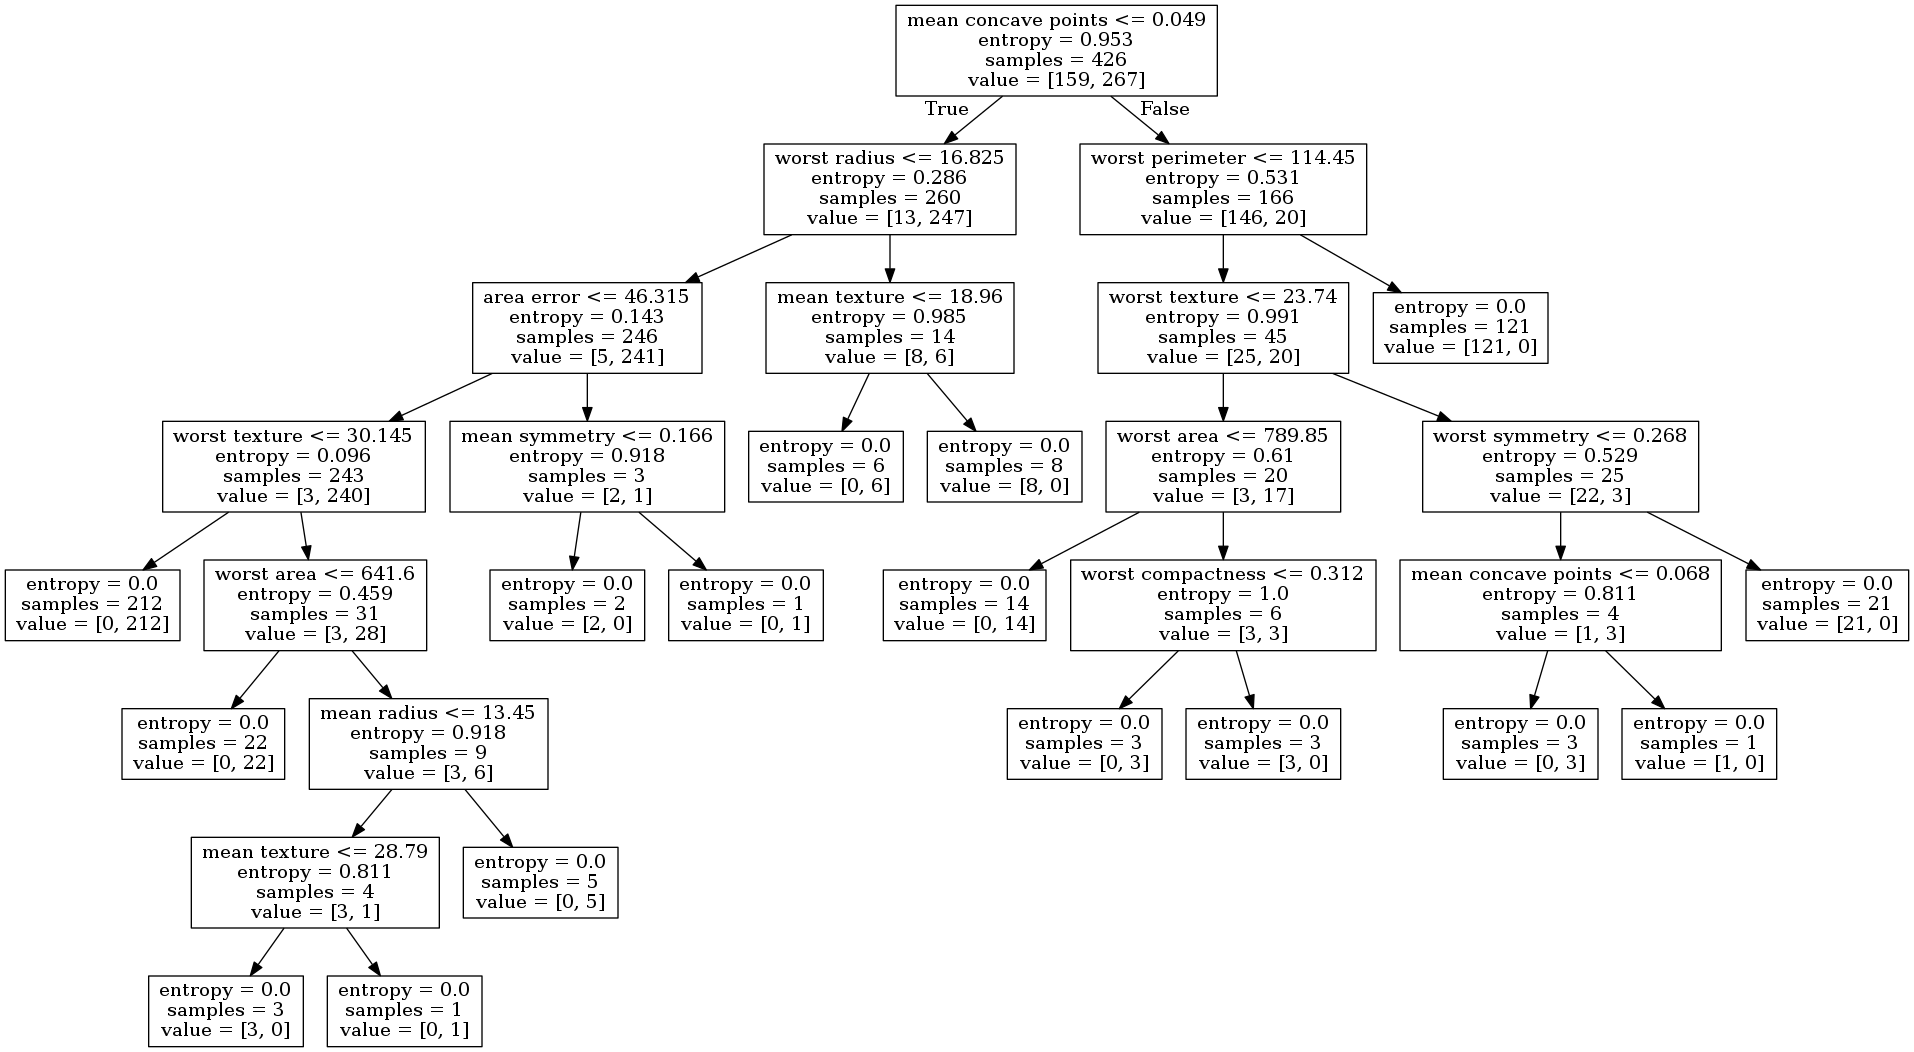

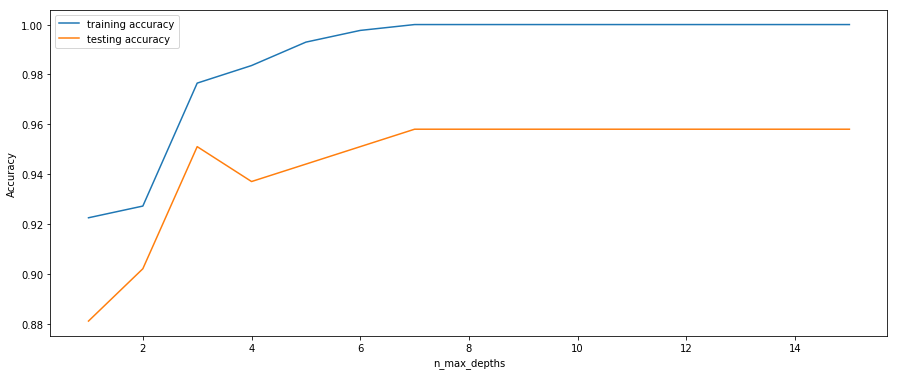

測試準確度: 0.951
訓練準確度: 0.977

最佳樹:


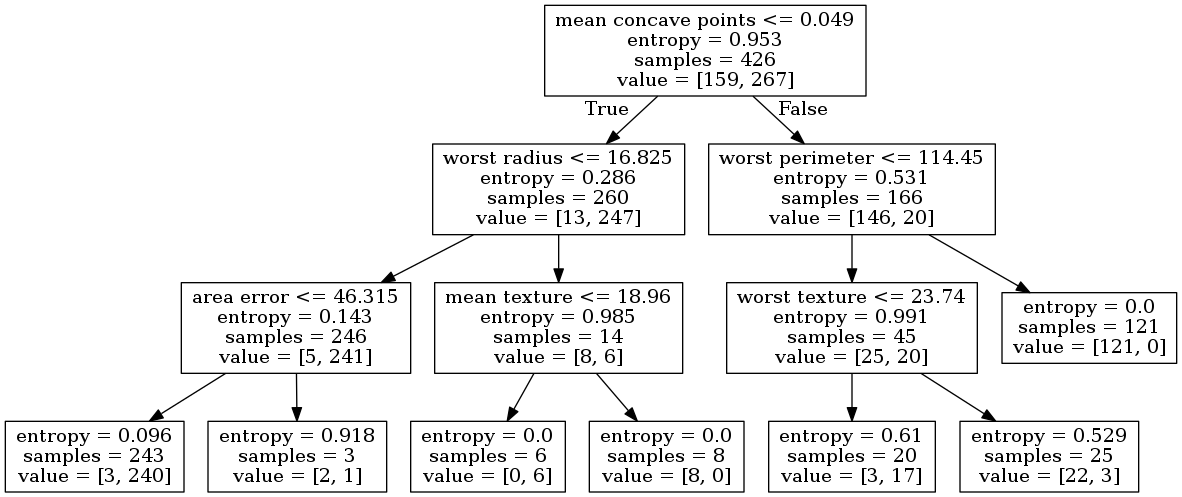

        Train      Test
最大樹  1.000000  0.958042
最佳樹  0.976526  0.951049


In [7]:
from IPython.display import display
from IPython.display import Image
import pandas as pd
import numpy  as np
#由此呼叫乳癌資料集
import pydotplus as pdp
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from io import StringIO #data r/w in memory
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

breast_cancer_dataset = datasets.load_breast_cancer()

X = breast_cancer_dataset.data
Y = breast_cancer_dataset.target
#X = breast_cancer_dataset.drop(X, Y, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 0)


print("X_train 的 (行數, 欄數): {}".format(X_train.shape))
print("y_train 的 (行數, 欄數): {}".format(y_train.shape))
print("X_test 的 (行數, 欄數): {}".format(X_test.shape))
print("y_test 的 (行數, 欄數): {}\n".format(y_test.shape))

#建立iris_dataframe，使用dataframe資料型態可以以表格的方式紀錄每一筆樣本的特徵資料
#breast_cancer_dataframe = pd.DataFrame(X_train, columns = breast_cancer_dataset.feature_names)
#breast_cancer_dataframe

#繪出iris_dataframe的散佈矩陣圖
#scatter_pic = pd.plotting.scatter_matrix(breast_cancer_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20})
#scatter_pic


#==============================================================================
#建立決策樹(最大樹)模型
#==============================================================================
dt_max = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#print(dt_max)
dt_max = dt_max.fit(X_train, y_train)
#print(dt_max)

# 預測結果: predict_result; 真實結果: y_test
predict_result = dt_max.predict(X_test)
acc = metrics.accuracy_score(y_test, predict_result)
dt_max_testing_acc = acc
print("測試準確度: {:.3f}".format(dt_max_testing_acc))

predict_result = dt_max.predict(X_train)
acc = metrics.accuracy_score(y_train, predict_result)
dt_max_training_acc = acc
print("訓練準確度: {:.3f}".format(dt_max_training_acc))

print("\n最大樹：")
dot_data = StringIO()
export_graphviz(dt_max, out_file = dot_data, feature_names = breast_cancer_dataset.feature_names)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

#以下是計算最大樹在不同最大深度設定下，預測訓練/測試集的準確度
training_accuracy= [] 
testing_accuracy= [] 
#max_depth_setting = **建立可迭代物件，此物件包含1到10的整數** 最大深度從1到10
for i in range(1, 16): #執行迴圈
    #建立決策樹，初始化參數設定最大深度(max_depth)為i、隨機狀態(random_state)為0
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i, random_state = 0)
    # 在training_accuracy中新增此次迭代建立的模型的訓練準確度
    clf.fit(X_train, y_train)
    predict_result = clf.predict(X_train)
    acc = metrics.accuracy_score(y_train, predict_result)
    training_accuracy.append(acc)
    # 在testing_accuracy中新增此次迭代建立的模型的測試準確度
    predict_result = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, predict_result)
    testing_accuracy.append(acc)

#training_accuracy   
#testing_accuracy

max_depth_setting = list(range(1, 16))

#以下是繪出上面計算的訓練/測試集準確度折線圖
plt.figure(2,figsize=(15,6))#建立figure
plt.plot(max_depth_setting, training_accuracy, label="training accuracy")#加入訓練集準確度折線圖
plt.plot(max_depth_setting, testing_accuracy, label="testing accuracy")#加入測試集準確度折線圖
plt.ylabel("Accuracy")#加入y軸的lable
plt.xlabel("n_max_depths")#加入x軸的lable
plt.legend()#加入圖例
plt.show()#顯示折線圖

#==============================================================================
#建立決策樹(最佳樹)模型
#==============================================================================
dt_best = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
dt_best = dt_best.fit(X_train, y_train)

# 預測結果: predict_result; 真實結果: y_test
predict_result = dt_best.predict(X_test)
acc = metrics.accuracy_score(y_test, predict_result)
dt_best_testing_acc = acc
print("測試準確度: {:.3f}".format(dt_best_testing_acc))

predict_result = dt_best.predict(X_train)
acc = metrics.accuracy_score(y_train, predict_result)
dt_best_training_acc = acc
print("訓練準確度: {:.3f}".format(dt_best_training_acc))

print("\n最佳樹:")
#以下是繪出最大樹的樹狀圖
dot_data = StringIO()
export_graphviz(dt_best, out_file = dot_data, feature_names = breast_cancer_dataset.feature_names)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

#==============================================================================
#比較最大樹與最佳樹的模型
#==============================================================================
TrainList = [dt_max_training_acc, dt_best_training_acc]
TestList =  [dt_max_testing_acc, dt_best_testing_acc]
model_comparison = {'Train': TrainList, 'Test': TestList}
result = pd.DataFrame(model_comparison, index=['最大樹', '最佳樹'])
print(result)
